<a href="https://colab.research.google.com/github/SorayaFrancoLopez/NN_churn_proyect_insurance/blob/main/STEP3_Training_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score, roc_curve, precision_recall_curve
import joblib
from joblib import dump

In [2]:
def evaluacion(y_true, y_pred, y_pred_proba):
    """
    Realiza operaciones de métricas de evaluación sobre los resultados del entrenamiento.

    Parámetros:
        - y_true: Etiquetas verdaderas.
        - y_pred: Etiquetas predichas.
        - y_pred_proba: Probabilidades predichas.

    Retorna:
        - Accuracy del modelo
        - Precision_score
        - Recall_score
        - F1_score
        - Matriz de confusión
        - Calculo de ROC-AUC
        - Gráficas de métricas:
            * Curva ROC
            * Curva de precisión
            * Matriz de Confusión
            * Histograma de Probabilidad
    """

    # Accuracy
    accuracy = accuracy_score(y_true, y_pred)
    print("Accuracy:", accuracy)

    # Precisión
    precision = precision_score(y_true, y_pred)
    print("Precision:", precision)

    # Recall
    recall = recall_score(y_true, y_pred)
    print("Recall:", recall)

    # F1-score
    f1 = f1_score(y_true, y_pred)
    print("F1-score:", f1)

    # Matriz de Confusión
    conf_matrix = confusion_matrix(y_true, y_pred)
    print("Confusion Matrix:\n", conf_matrix)

    # Calcula la ROC-AUC
    roc_auc = roc_auc_score(y_true, y_pred_proba)
    print("ROC-AUC Score:", roc_auc)

    # Calcula la curva ROC.
    fpr, tpr, _ = roc_curve(y_true, y_pred_proba)

    # Calcula la curva de precisión y recuperación
    precision, recall, _ = precision_recall_curve(y_true, y_pred_proba)

    # Gráficos
    plt.figure(figsize=(7, 7))

    # Curva ROC
    plt.subplot(2, 2, 1)
    plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Curva ROC')
    plt.legend(loc="lower right")

    # Curva de precisión y recuperación
    plt.subplot(2, 2, 2)
    plt.plot(recall, precision, color='green', lw=2, label='Precision-Recall curve')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curve')
    plt.legend(loc="lower left")

    # Matriz de confusión
    plt.subplot(2, 2, 3)
    sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g')
    plt.title('Matriz de Confusión')

    # Histograma de probabilidades predichas
    plt.subplot(2, 2, 4)
    plt.hist(y_pred_proba, bins=20, color='orange', alpha=0.7)
    plt.xlabel('Predicted Probability')
    plt.ylabel('Frequency')
    plt.title('Histograma de probabilidades')
    plt.tight_layout()
    plt.show()

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
df = pd.read_csv("/content/drive/MyDrive/Churn Rate Algorithm/dfclean.csv", delimiter=',', encoding='latin1')

In [5]:
columnas_seleccionadas = ['PrimasPagadas_Menos1', 'Edad', 'PrimasPagadas_Menos2',
                       'sCodPostal', 'PrimasPagadas_Menos3', 'Num_Pol_Vigor_Menos1',
                       'AnosCliente', 'SEXO', 'Num_Pol_Vigor_Menos2', 'Num_Pol_Vigor_Menos3','target'
                       ]

df = df.drop(columns=df.columns.difference(columnas_seleccionadas))

In [6]:
df.shape

(16178, 11)

In [7]:
# Dividir
X = df.drop(columns=['target'])
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
param_grid = {
    'n_estimators': [100, 200, 300],  # Número de árboles en el bosque
    'max_depth': [None, 10, 20],  # Profundidad máxima de los árboles
    'min_samples_split': [2, 5, 10],  # Número mínimo de muestras requeridas para dividir un nodo
    'min_samples_leaf': [1, 2, 4]  # Número mínimo de muestras requeridas en cada hoja del árbol
}

clf = RandomForestClassifier(random_state=42)

grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

#Búsqueda en cuadrícula en los datos de entrenamiento
grid_search.fit(X_train, y_train)

# Obtener el mejor modelo y los mejores hiperparámetros
best_clf = grid_search.best_estimator_
best_params = grid_search.best_params_

print("Mejor modelo:", best_clf)
print("Mejores hiperparámetros:", best_params)

Mejor modelo: RandomForestClassifier(n_estimators=300, random_state=42)
Mejores hiperparámetros: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}


Accuracy: 0.8430160692212608
Precision: 0.8289241622574955
Recall: 0.8666256914566687
F1-score: 0.8473557692307692
Confusion Matrix:
 [[1318  291]
 [ 217 1410]]
ROC-AUC Score: 0.9177383823246849


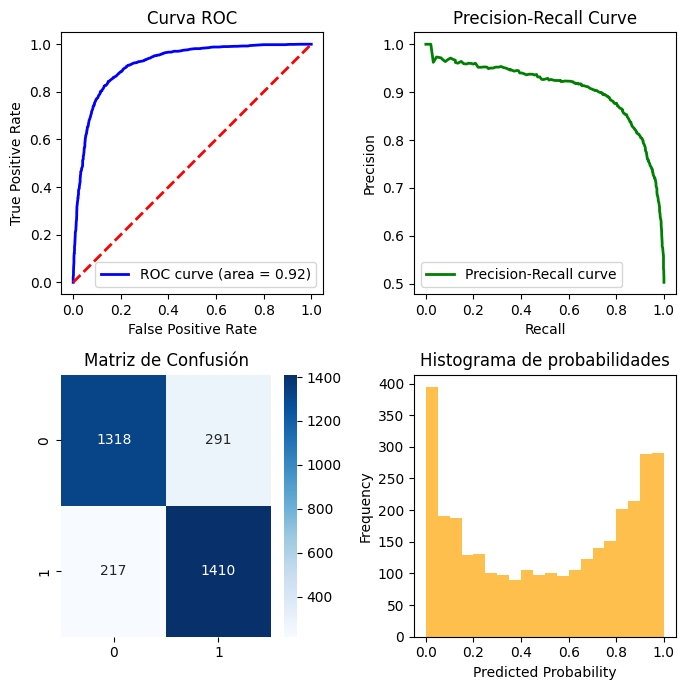

In [9]:
#RandomForestClassifier con los mejores hiperparámetros obtenidos
best_clf = RandomForestClassifier(n_estimators=300, max_depth=None, min_samples_split=2, min_samples_leaf=1, random_state=42)

# Entrenar
best_clf.fit(X_train, y_train)

# Predecir
y_pred = best_clf.predict(X_test)
y_pred_proba = best_clf.predict_proba(X_test)[:, 1]

# Evaluar el modelo
evaluacion(y_test, y_pred, y_pred_proba)

In [18]:
directorio_modelo = '/content/drive/MyDrive/Churn Rate Algorithm/'
#Descarga del modelo.
dump(best_clf, directorio_modelo + 'prediccion_clientes.pkl')

['/content/drive/MyDrive/Churn Rate Algorithm/modelo_entrenado.pkl']